# Day 21 - Introduction to Regression Analysis in Python

In [ ]:
# Packages required for this lesson
#!pip install scikit-learn matplotlib pandas

## Basics of Regression Analysis and Simple Linear Regression

To summarize: **given some example X values with known Y values, can we use a line to predict the Y values of new, unlabeled X values?**

Regression analysis is a cornerstone of data science, particularly in the field of supervised learning. It allows us to predict the value of a continuous variable based on one or more other variables. For example, we might use regression to predict the price of a house based on its size, location, and age. Importantly, regression is not suitable for predicting categorical variables; such tasks are better handled by classification methods like logistic regression, which we will explore in a later lesson.

Understanding the difference between supervised and unsupervised learning is crucial. In supervised learning, our model learns from a labeled dataset, which means each example in the dataset is paired with the correct output. Regression is a form of supervised learning because it requires a dataset with known outputs to learn the relationship between variables. In contrast, unsupervised learning involves finding patterns in data where the outcomes are not known in advance.

Regression Analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This method is used for forecasting, time series modelling, and finding the causal effect relationship between the variables. Among its various types, Simple Linear Regression is the most basic and widely used one, especially when data exhibits a linear relationship.

### Theoretical Concepts

#### Definition and Purpose of Regression Analysis
Regression analysis is a powerful statistical method that enables you to examine the relationship between two or more variables of interest. While it is often utilized to predict the value of a dependent variable based on the values of at least one independent variable, it's essential to note that it is best suited for continuous variables. Logistic regression is its counterpart for categorical outcomes and will be discussed in upcoming lessons.

Given the data (red points in the plot below), linear regression is the process to find the best line through them (in blue).

(0.0, 6.0)

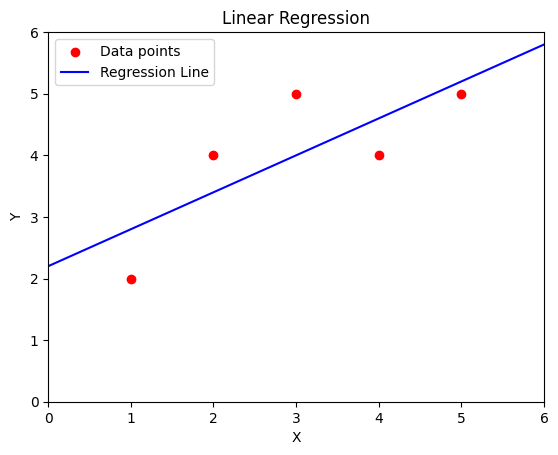

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# example line parameters
m = 0.6
y_intercept = 2.2

plt.scatter(x, y, color='red', label='Data points')
plt.plot([0, 6], [y_intercept, m * 6 + y_intercept], color='blue', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.ylim(0.0, 6.0) 
plt.xlim(0.0, 6.0)

#### Difference Between Supervised and Unsupervised Learning
In the realm of machine learning, supervised learning entails training a model on a dataset that includes both the inputs and the expected outputs. Regression, being a part of supervised learning, relies on labeled data to learn the relationship between input features and the target variable.

Understanding the distinction between supervised and unsupervised learning establishes the groundwork on which type of algorithms, including regression, are selected based on the data's nature and the learning task.

#### Overview of Simple Linear Regression
Simple Linear Regression models the relationship between a single independent variable and a dependent variable by fitting a best-fit straight line. This line is known as the regression line and represented by a linear equation `Y = a * X + b`.

This introduction sets the stage for understanding how a simple linear regression model is constructed, predicting the dependent variable using a single independent variable.

### Mathematical Foundation

#### Explanation of Linear Equations: $y=mx+c$

The simplest form of regression is simple linear regression, where we predict the outcome as a linear function of the input. The equation for a line in two dimensions is \(y = mx + c\), where:
- \(y\) is the value we want to predict (dependent variable).
- \(m\) is the slope of the line.
- \(x\) is our input variable (independent variable).
- \(c\) is the y-intercept, which tells us the value of \(y\) when \(x\) is 0.

If you got all of that, then this summary of `y = mx + c` should make sense: `y` is the dependent variable, `x` is the independent variable, `m` is the slope of the line, and `c` is the y-intercept.

This equation is the mathematical foundation of simple linear regression, describing how the dependent variable `y` changes with the independent variable `x`.

Let's discuss a few equations:

1. **Sample Mean** $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$:
   - $\bar{y}$: Sample mean of the dependent variable.
   - $y_i$: Value of the dependent variable for the \(i\)-th observation.
   - $n$: Number of observations in the sample.

This equation calculates the average value of the dependent variable $y$, which is fundamental in many statistical analyses, including regression.

All that to say: the average of the data points. Sum all indpendent / input values, then divide by the number of data points.

2. **Sample Slope** $\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}$:
   - $\hat{\beta}_1$: Estimated slope of the regression line.
   - $X_i$: Value of the independent variable for the $i$-th observation.
   - $\bar{X}$: Mean of the independent variable.
   - $Y_i$: Value of the dependent variable for the $i$-th observation.
   - $\bar{Y}$: Mean of the dependent variable.

**slope** indicates how much the dependent variable is expected to increase when the independent variable increases by one unit.

3. **Sample Intercept** $\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X}$:
   - $\hat{\beta}_0$: Estimated intercept of the regression line.
   - $\bar{Y}$: Mean of the dependent variable.
   - $\hat{\beta}_1$: Estimated slope of the regression line.
   - $\bar{X}$: Mean of the independent variable.

the **y-intercept** of our predicted line gives the expected value of the dependent variable when the independent variable is zero. If your data isn't meaningful at an X-value of zero, then your y-intercept may not be a meaningful value in isolation, but it's still a necessary mathematical consequence of interpreting your data as being along some theoretical line. For an example, consider: what is the value of a 0 square foot home?

4. **Sample Regression Line** $\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon}_i$:
   - $\hat{Y}_i$: Predicted value of the dependent variable for the $i$-th observation.
   - $\hat{\beta}_0$: Estimated intercept of the regression line.
   - $\hat{\beta}_1$: Estimated slope of the regression line.
   - $X_i$: Value of the independent variable for the $i$-th observation.
   - $\hat{\epsilon}_i$: Residual (error) for the $i$-th observation, the difference between the observed and predicted values.

This is the formula for the estimated regression line, showing how the dependent variable is predicted from the independent variable in the sample.

5. **Conditional Variance** $\hat{\sigma}^2 = \frac{\sum{\hat{\epsilon}}^2_i} {n – 2} = \frac{\sum(Y_i – \hat{Y}_i)^2} {n – 2}$:
   - $\hat{\sigma}^2$: Estimated variance of the residuals.
   - $\hat{\epsilon}_i$: Residual (error) for the $i$-th observation.
   - $Y_i$: Observed value of the dependent variable for the $i$-th observation.
   - $\hat{Y}_i$: Predicted value of the dependent variable for the $i$-th observation.
   - $n$: Number of observations in the sample.

**variance of residuals** measures how well the regression line fits the data. Lower values indicate a better fit. See least squares below for more discussion on residuals.

Try to identify the different elements described in these equations on these plots. The plot on the left is an optimal linear regression, which minimizes the distance from the line to each data point. On the right, we've selected a slope and y-intercept that have worse performance.

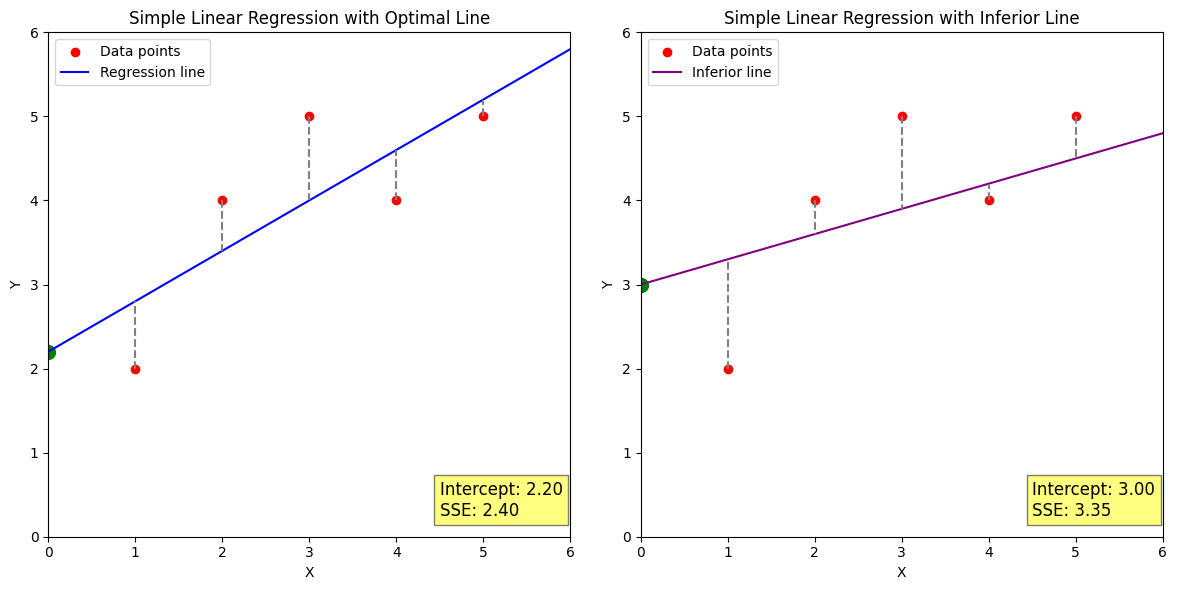

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Original data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Model fitting
model = LinearRegression().fit(x.reshape(-1, 1), y)
predictions = model.predict(x.reshape(-1, 1))

# Sum of Squared Errors
sse = np.sum((y - predictions) ** 2)

# Plot with regression line, intercept, residuals
plt.figure(figsize=(12, 6))

# First subplot
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='red', label='Data points')
plt.plot([0, 6], [model.intercept_, model.coef_[0] * 6 + model.intercept_], color='blue', label='Regression line')
plt.scatter(0, model.intercept_, color='green', marker='o', s=100)  # Intercept point
for i in range(len(x)):
    plt.vlines(x[i], ymin=y[i], ymax=predictions[i], linestyles='dashed', color='gray')  # Residuals
plt.title('Simple Linear Regression with Optimal Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.text(4.5, 0.25, f'Intercept: {model.intercept_:.2f}\nSSE: {sse:.2f}', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
plt.ylim(0.0, 6.0) 
plt.xlim(0.0, 6.0)

# Deliberately inferior line
# Assuming a different slope and intercept
inferior_slope = 0.3
inferior_intercept = 3
inferior_predictions = inferior_slope * x + inferior_intercept
inferior_sse = np.sum((y - inferior_predictions) ** 2)

# Second subplot
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='red', label='Data points')
plt.plot([0, 6], [inferior_intercept, inferior_slope * 6 + inferior_intercept], color='purple', label='Inferior line')
plt.scatter(0, inferior_intercept, color='green', marker='o', s=100)  # Intercept point
for i in range(len(x)):
    plt.vlines(x[i], ymin=y[i], ymax=inferior_predictions[i], linestyles='dashed', color='gray')  # Residuals
plt.title('Simple Linear Regression with Inferior Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.text(4.5, 0.25, f'Intercept: {inferior_intercept:.2f}\nSSE: {inferior_sse:.2f}', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
plt.ylim(0.0, 6.0) 
plt.xlim(0.0, 6.0)
plt.tight_layout()
plt.show()

#### Explanation of Hyperplanes and "Linear" Relations Above Two Dimensions
The vast majority of examples you will see focus on data shown on a scatterplot - the two dimensions shown are X and Y. Yet the relation we try to draw through the data is often a line - it has an angle or slope to it, but it's a straight line, just like the X axis. The solution we have has one less dimenion than our data. The "one dimension" of this solution is the slope. 

When dealing with more than one input variable, the concept of a line extends to a plane. In three dimensions, a scatterplot looks like a cloud of points in space. (You may see the axes labeled as X, Y, and Z, as in computer graphics, but data scientists may label them $x_1$, $x_2$, and $y$.) The linear relation we draw through these points has two dimensions, and can be visualized as a plane angled within 3D space. The "two dimensions" here are the two independent angles a plane can be rotated by.

Above 3 dimensions, just as the line and plane examples, your linear regression will have one less dimension than your input space. We simply refer to those solutions above 2 dimensions as hyperplanes. To be clinical about it: `In mathematics, a hyperplane is a subspace whose dimension is one less than that of its ambient space`. Since most humans cannot meaningfully visualize 4-dimensional data and a 3-dimensional solution, we generally teach towards examples with low dimensionality, and leave the mind-bending visualization of hyperplane solutions often required for real-world problem solving as an exercise for the reader.

#### Concept of Best-Fit Line and Least Squares Method
The least squares method is a statistical technique to determine the best fit line by minimizing the sum of squares of the residuals—the differences between observed and estimated values.

*Why square it?* There's at least two reasons to use the square of residuals rather than just using them directly:

* To prevent positive and negative values from cancelling out. Squared error is always positive, and residuals above and below the line have equal weight.
* To penalize larger residuals. The lowest squared error gets equally close to all points. Consider a line that goes straight between two data points: a squared error of $2r^2$. Getting equally closer to one point and farther from the other changes that to $(r-a)^2 + (r+a)^2$. (The y-intercept was changed by $\pm a$.) Thanks to the exponent, this is always larger, while strictly adding or subtracting residuals might cause these lines to be completely equivalent.


### Python Implementation

It's possible to implement regression yourself, without libraries - if you are so inclined, that is left as **an exercise for the reader**. You might start with a line from your lowest X value through your highest X value, then adjust slope and y-intercept to reduce error. For now, let's get more acquainted with a library that will do a fast and accurate job.

#### Implementing Simple Linear Regression with scikit-learn
Scikit-learn is a popular machine learning library that provides various tools for data mining and analysis. Implementing simple linear regression with scikit-learn is straightforward.



In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression().fit(x, y)

print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")

Coefficient: [0.6], Intercept: 2.2


This code snippet demonstrates how to implement a simple linear regression model using scikit-learn. The reshape method is used to format the data appropriately for the model.

The output shows the model's slope (coefficient) and intercept, key components of the linear equation that predicts the dependent variable's value.


#### Visualizing Data and Regression Line Using matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is highly useful for visualizing relationships between variables.



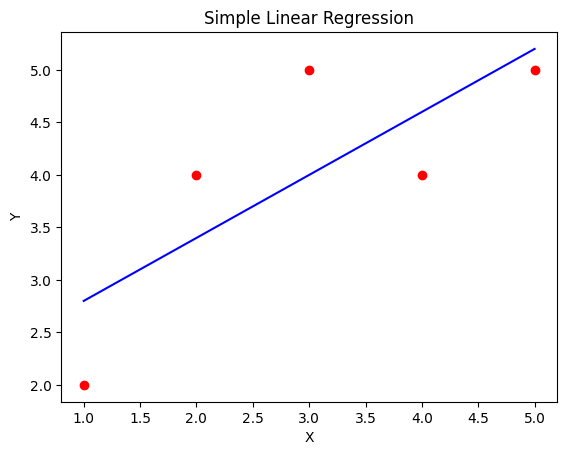

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
prediction = model.predict(x.reshape(-1, 1))

plt.scatter(x, y, color='red')
plt.plot(x, prediction, color='blue')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Example Dataset

#### Import and Analyze a Housing Dataset

**This is confabulated data.** There's no basis in reality for the CSV file included here. Consider trying your new skills against publicly available real data, or with [toy datasets included with sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [27]:
import pandas as pd

# Assuming housing_data.csv is available
housing_data = pd.read_csv('housing_data.csv')

print(housing_data.head())

   SquareFeet   Price  Bedrooms  Bathrooms  Location  Age
0         850  200000         2        1.0  Suburban    5
1         900  205000         2        1.5     Urban   10
2        1200  210000         3        2.0     Rural   15
3         950  215000         2        1.5  Suburban    8
4        1100  220000         3        2.0     Urban   25


#### Build a Simple Linear Regression Model to Predict Housing Prices
Using the previously introduced concepts and tools, we now aim to build a simple linear regression model to predict housing prices based on a single predictor variable from our dataset.

##### Test Train Split

This is an important element for future models: you should reserve some data so that you can test your model's performance against data that wasn't used to train it. Linear regression is not overly prone to memorization, but it's a good practice and can highlight issues in how your data was stratified.

In the case of linear regression on 2D data, "model" just means "the y-intercept and slope".

In this example, the **train** data is used to build the model, and the **test** data is predicted with the model. Going beyond this, if you like your model's output, you can use it in **inference**: predicting Y values that you don't actually know yet. The test data's performance will be an indicator of your model's usefulness, if your training data was sufficiently representative.

Model Coefficient: [107.6641786], Intercept: 103044.81439951799


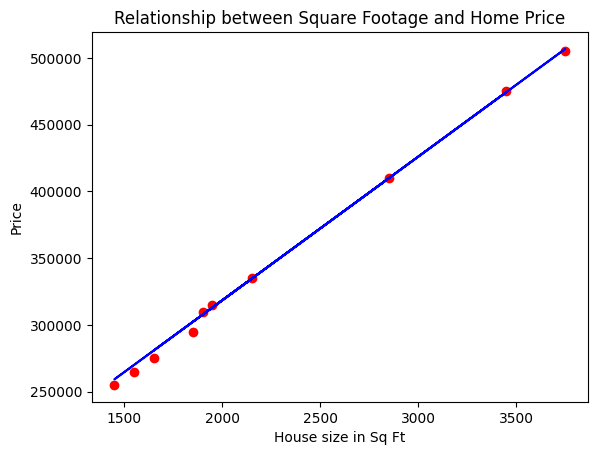

In [30]:
from sklearn.model_selection import train_test_split

X = housing_data[['SquareFeet']] # Predictor
y = housing_data['Price'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

print(f"Model Coefficient: {model.coef_}, Intercept: {model.intercept_}")

prediction = model.predict(X_test)

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, prediction, color='blue')
plt.title('Relationship between Square Footage and Home Price')
plt.xlabel('House size in Sq Ft')
plt.ylabel('Price')
plt.show()

### Excercise for the Reader

Implementing and understanding linear regression. Look through the code in this lesson's various plots. Repeat this procedure until you're satisfied with your understanding:

* Find some data to plot. Use an online dataset, an sklearn toy dataset, a different column from the housing file above, or a mathematical function (even $x^2$ and $x^-3$ are interesting picks).
* Plot the data with matplotlib or similar.
* Select a slope and y-intercept. Random, through two datapoints, a fixed starting value, etc.
* Calculate residuals (distance from each Y value to the prediction).
* Adjust slope and y-intercept of your selected line to reduce error. Adjust by hand, or do it with a loop.
* Compare your solution to the `sklearn` model outputs.